In [1]:
import math
import SDToolbox as sd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p_start = 100000.0;
p_end = 1000000.0;
T_start = 300.0;
T_end = 1000.0;
phi_start = 0.5;
phi_end = 1.5;
p_steps = 10;
T_steps = 7;
phi_steps = 11;

In [3]:
mech = 'gri30.cti';   
sd.gas  = sd.Solution(mech); 

In [4]:
p1 = np.zeros(p_steps);
p1bar = np.zeros(p_steps);
T1 = np.zeros(T_steps);
phi = np.zeros(phi_steps);
cj_speed = np.zeros((p_steps, T_steps, phi_steps));
print(cj_speed[0,:,0])

[ 0.  0.  0.  0.  0.  0.  0.]


In [5]:
p_index = 0;
T_index = 0;
phi_index = 0;

while p_index < p_steps:
    
    p1[p_index] = p_start + p_index*(p_end - p_start)/(p_steps - 1);
    p1bar[p_index] = p1[p_index]/100000;
    
    while T_index < T_steps:
        
        T1[T_index] = T_start + T_index*(T_end - T_start)/(T_steps - 1);
        
        while phi_index < phi_steps:
            
            phi[phi_index] = phi_start + phi_index*(phi_end - phi_start)/(phi_steps - 1);
            x = 'CH4:%.2f O2:2.0 N2:7.52' % phi[phi_index];
            sd.gas.TPX = T1[T_index],p1[p_index],x;
            [cj_speed[p_index,T_index,phi_index],gas] = sd.cv_CJ(0, p1[p_index], T1[T_index], x, mech, 0);
            phi_index += 1;
        
        T_index += 1;
        phi_index = 0;
    
    p_index += 1;
    T_index = 0;
    phi_index = 0;
    print(p_index)

1
2
3
4
5
6
7
8
9
10


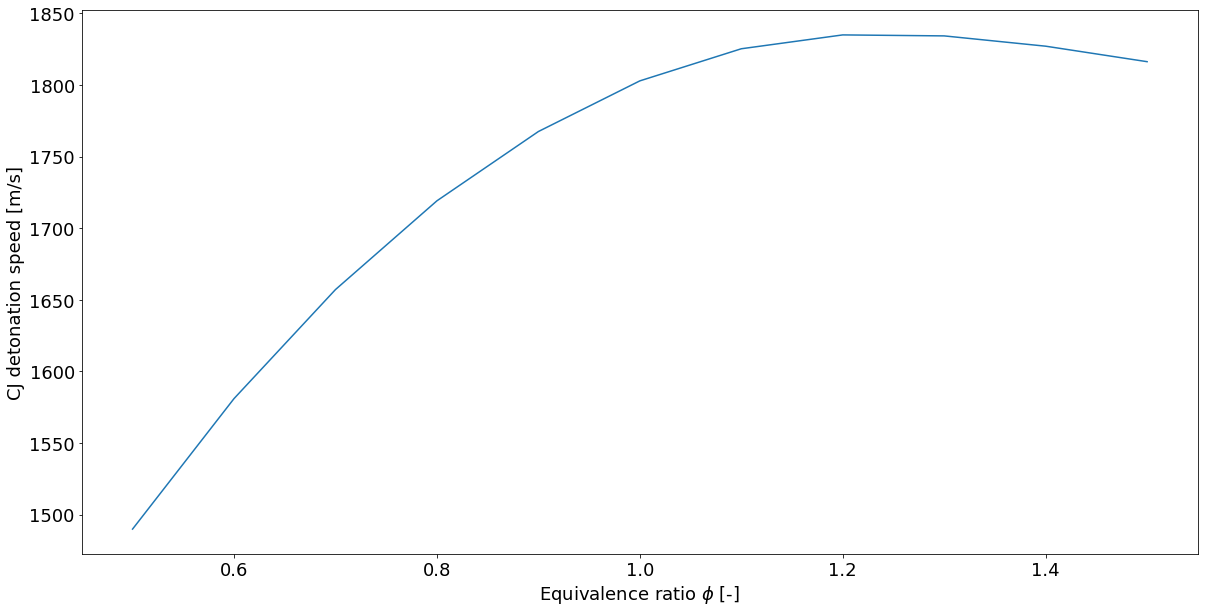

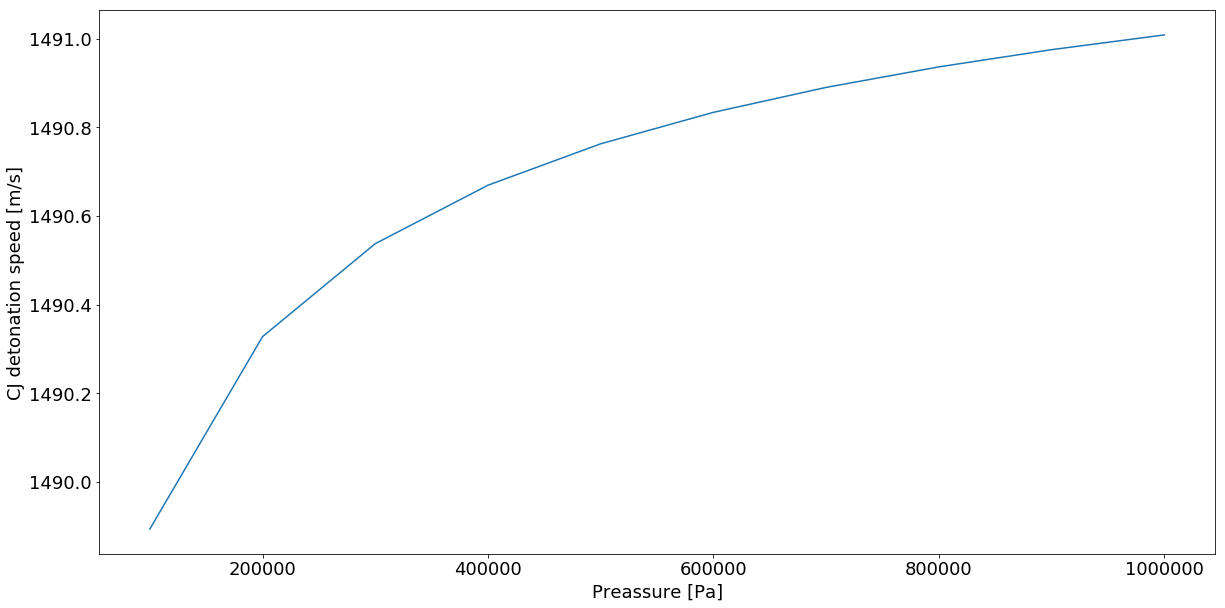

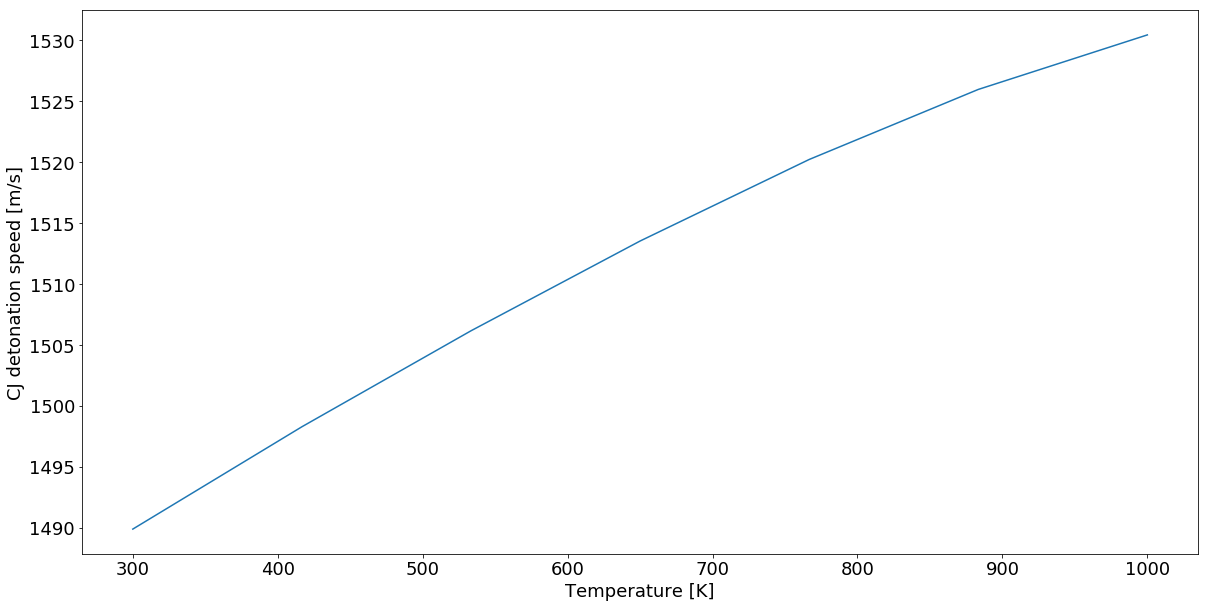

In [19]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

plt.figure(figsize=(20,10))
plt.plot(phi, cj_speed[0,0,:])
plt.xlabel('Equivalence ratio $\phi$ [-]')
plt.ylabel('CJ detonation speed [m/s]')
plt.title("")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(p1bar, cj_speed[:,0,0])
plt.xlabel('Preassure [Pa]')
plt.ylabel('CJ detonation speed [m/s]')
plt.title("")
plt.show()
#plt.savefig('T_z_Xvar.png')

plt.figure(figsize=(20,10))
plt.plot(T1, cj_speed[0,:,0])
plt.xlabel('Temperature [K]')
plt.ylabel('CJ detonation speed [m/s]')
plt.title("")
plt.show()
#plt.savefig('T_z_Xvar.png')

In [6]:
print(cj_speed[0,0,:])
print(cj_speed[0,1,:])

[ 1489.89323973  1580.99365881  1657.12382199  1719.0964079   1767.4753469
  1802.84778773  1825.2693627   1834.94545712  1834.25691456  1827.07181915
  1816.25412282]
[ 1498.29171877  1585.63211272  1657.37502854  1714.81805432  1759.57892932
  1793.14225127  1816.16087929  1828.77996897  1832.00928061  1828.27812967
  1820.12159359]
